In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Heart_Failure.csv', sep=',')
print(df.head(5), "\n")
print(df.info(), "\n")
print(df.shape, "\n")
print(df.dtypes, "\n")

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110

In [4]:
# отбор числовых колонок (Числовые признаки)
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['id' 'age' 'hypertension' 'heart_disease' 'avg_glucose_level' 'bmi'
 'stroke']


In [5]:
# отбор нечисловых колонок (Категориальные признаки)
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['gender' 'ever_married' 'work_type' 'Residence_type' 'smoking_status']


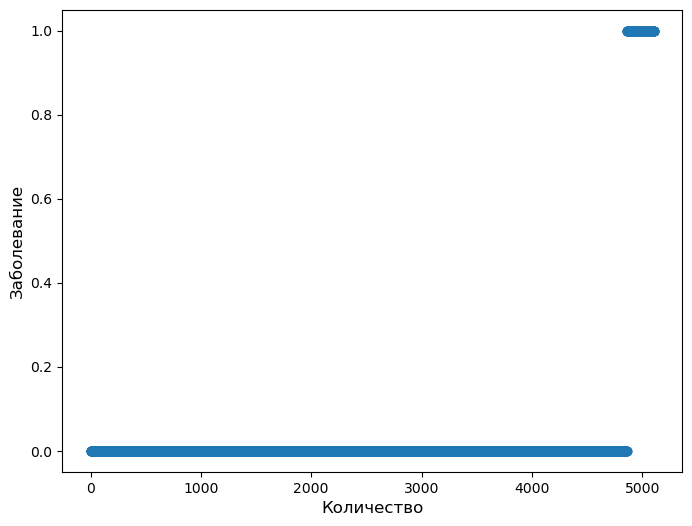

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(range(df.shape[0]), np.sort(df.stroke.values))
plt.xlabel('Количество', fontsize=12)
plt.ylabel('Заболевание', fontsize=12)
plt.show()

In [13]:
print(df.describe())

                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0

In [15]:
# смотрим количество пропусков по каждой переменной
print(df.shape[0])
df.isnull().sum()*100/df.shape[0]

5110


id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [16]:
# или так
for col in df.columns:
 pct_missing = np.mean(df[col].isnull())
 k=round(pct_missing*100)
 print('{} - {}%'.format(col, k))

id - 0%
gender - 0%
age - 0%
hypertension - 0%
heart_disease - 0%
ever_married - 0%
work_type - 0%
Residence_type - 0%
avg_glucose_level - 0%
bmi - 4%
smoking_status - 0%
stroke - 0%


In [21]:
# Метод удаления по списку

# отбрасываем строки с большим количеством пропусков
df_del= df.dropna()
print(df_del.describe())
df_del

                 id          age  hypertension  heart_disease  \
count   4909.000000  4909.000000   4909.000000    4909.000000   
mean   37064.313506    42.865374      0.091872       0.049501   
std    20995.098457    22.555115      0.288875       0.216934   
min       77.000000     0.080000      0.000000       0.000000   
25%    18605.000000    25.000000      0.000000       0.000000   
50%    37608.000000    44.000000      0.000000       0.000000   
75%    55220.000000    60.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        4909.000000  4909.000000  4909.000000  
mean          105.305150    28.893237     0.042575  
std            44.424341     7.854067     0.201917  
min            55.120000    10.300000     0.000000  
25%            77.070000    23.500000     0.000000  
50%            91.680000    28.100000     0.000000  
75%           113.570000    33.100000     0

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [20]:
# Отбрасывание признаков

cols_to_drop = ['bmi']
df_less_Insulin = df.drop(cols_to_drop, axis=1)
df_less_Insulin

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,formerly smoked,0


In [24]:
# Внесение недостающих значений

med = df['bmi'].median()
print(med)
df_med = df
df_med['bmi'] = df_med['bmi'].fillna(med)
df_med

28.1


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [26]:
# Одномерное восстановление признаков

from sklearn.impute import SimpleImputer

# Создаём объект класса SimpleImputer с параметрами:
# - помечаем пропуски, как np.nan
# - указываем арифметическое среднее в качестве стратегии заполнения
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# Настраиваем алгоритм обучения
imputer = imputer.fit(df_numeric)
#преобразуем матрицу к формату dataframe
df_new1 = pd.DataFrame(imputer.transform(df_numeric.loc[:,:]), columns = df_numeric.columns)
df_new1.round(2)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046.0,67.0,0.0,1.0,228.69,36.60,1.0
1,51676.0,61.0,0.0,0.0,202.21,28.89,1.0
2,31112.0,80.0,0.0,1.0,105.92,32.50,1.0
3,60182.0,49.0,0.0,0.0,171.23,34.40,1.0
4,1665.0,79.0,1.0,0.0,174.12,24.00,1.0
...,...,...,...,...,...,...,...
5105,18234.0,80.0,1.0,0.0,83.75,28.89,0.0
5106,44873.0,81.0,0.0,0.0,125.20,40.00,0.0
5107,19723.0,35.0,0.0,0.0,82.99,30.60,0.0
5108,37544.0,51.0,0.0,0.0,166.29,25.60,0.0


In [27]:
# Многомерное восстановление признаков

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)
# Настраиваем алгоритм обучения
imp = imp.fit(df_numeric)
#преобразуем матрицу к формату dataframe
df_new1 = pd.DataFrame(imp.transform(df_numeric.loc[:,:]), columns = df_numeric.columns)
df_new1.round(2)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046.0,67.0,0.0,1.0,228.69,36.60,1.0
1,51676.0,61.0,0.0,0.0,202.21,31.02,1.0
2,31112.0,80.0,0.0,1.0,105.92,32.50,1.0
3,60182.0,49.0,0.0,0.0,171.23,34.40,1.0
4,1665.0,79.0,1.0,0.0,174.12,24.00,1.0
...,...,...,...,...,...,...,...
5105,18234.0,80.0,1.0,0.0,83.75,34.42,0.0
5106,44873.0,81.0,0.0,0.0,125.20,40.00,0.0
5107,19723.0,35.0,0.0,0.0,82.99,30.60,0.0
5108,37544.0,51.0,0.0,0.0,166.29,25.60,0.0


<Axes: >

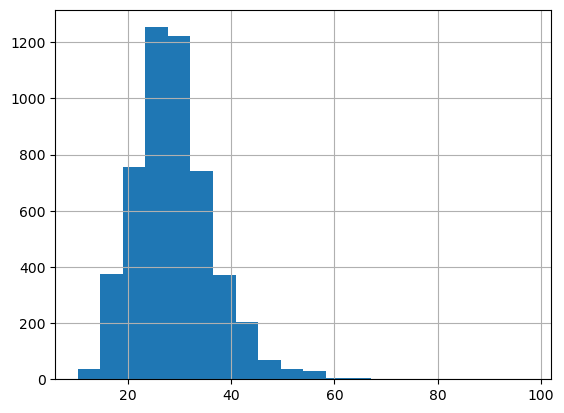

In [28]:
# Нетипичные данные (выбросы)

# Гистограмма/коробчатая диаграмма

df_new1['bmi'].hist(bins=20)

<Axes: >

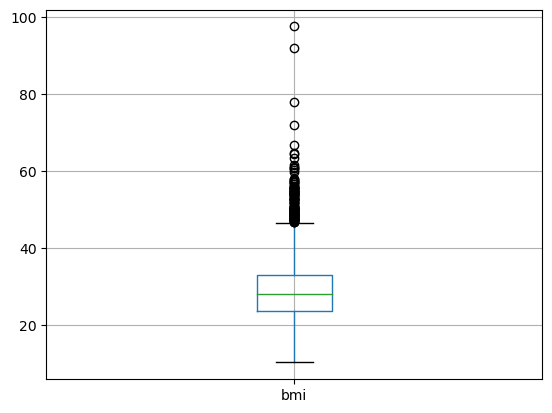

In [29]:
# Коробчатая диаграмма

df_new1.boxplot(column=['bmi'])

In [31]:
# Описательная статистика

df['bmi'].describe()

count    5110.000000
mean       28.862035
std         7.699562
min        10.300000
25%        23.800000
50%        28.100000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [32]:
df_new_del = df_new1.drop(np.where(df_new1['bmi'] >= 33)[0])
df_new_del['bmi'].describe()

count    3832.000000
mean       25.564466
std         4.598615
min        10.300000
25%        22.300000
50%        26.181548
75%        29.200000
max        32.949165
Name: bmi, dtype: float64

<Axes: >

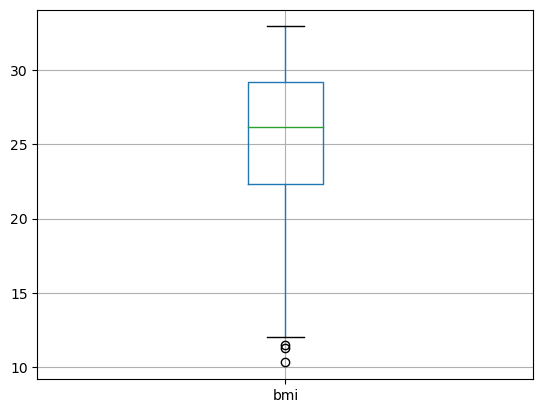

In [33]:
df_new_del.boxplot(column=['bmi'])

In [37]:
# Удаление мусора

# Неинформативные признаки

num_rows = len(df_numeric.index)
low_information_cols = []
for col in df_numeric.columns:
    cnts = df_numeric[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    print(top_pct*100)

    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

0.019569471624266144
1.9960861056751469
90.25440313111545
94.59882583170256
0.11741682974559686
3.9334637964774952
95.12720156555773
stroke: 95.12720%
stroke
0    4861
1     249
Name: count, dtype: int64



In [38]:
# Нерелевантные признаки

# Дубликаты записей

# отбрасываем неуникальные строки
df_dedupped = df_new_del.drop('id', axis=1).drop_duplicates()
# сравниваем формы старого и нового наборов
print(df_new_del.shape)
print(df_dedupped.shape)
df_dedupped

(3832, 7)
(3832, 6)


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
1,61.0,0.0,0.0,202.21,31.016494,1.0
2,80.0,0.0,1.0,105.92,32.500000,1.0
4,79.0,1.0,0.0,174.12,24.000000,1.0
5,81.0,0.0,0.0,186.21,29.000000,1.0
6,74.0,1.0,1.0,70.09,27.400000,1.0
...,...,...,...,...,...,...
5102,57.0,0.0,0.0,77.93,21.700000,0.0
5104,13.0,0.0,0.0,103.08,18.600000,0.0
5107,35.0,0.0,0.0,82.99,30.600000,0.0
5108,51.0,0.0,0.0,166.29,25.600000,0.0


In [41]:
key = ['id', 'age', 'avg_glucose_level','bmi']
df_new_del.fillna(-999).groupby(key)
df_dedupped2 = df_new_del.drop_duplicates(subset=key)
print(df_new_del.shape)
print(df_dedupped2.shape)
df_dedupped2

(3832, 7)
(3832, 7)


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
1,51676.0,61.0,0.0,0.0,202.21,31.016494,1.0
2,31112.0,80.0,0.0,1.0,105.92,32.500000,1.0
4,1665.0,79.0,1.0,0.0,174.12,24.000000,1.0
5,56669.0,81.0,0.0,0.0,186.21,29.000000,1.0
6,53882.0,74.0,1.0,1.0,70.09,27.400000,1.0
...,...,...,...,...,...,...,...
5102,45010.0,57.0,0.0,0.0,77.93,21.700000,0.0
5104,14180.0,13.0,0.0,0.0,103.08,18.600000,0.0
5107,19723.0,35.0,0.0,0.0,82.99,30.600000,0.0
5108,37544.0,51.0,0.0,0.0,166.29,25.600000,0.0


In [43]:
# Работа с текстовыми данными и их обработка

data_train = pd.read_csv('E:\\\\Магистратура\\\\3\\\\Машинное обучение\\\\healthcare-dataset-stroke-data.csv', sep=',')
data_test = pd.read_csv('E:\\\\Магистратура\\\\3\\\\Машинное обучение\\\\healthcare-dataset-stroke-data.csv', sep=',')
print(data_train)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

In [44]:
# отбор числовых колонок
df_numeric = data_train.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['id' 'age' 'hypertension' 'heart_disease' 'avg_glucose_level' 'bmi'
 'stroke']


In [45]:
# отбор нечисловых колонок
df_non_numeric = data_train.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['gender' 'ever_married' 'work_type' 'Residence_type' 'smoking_status']


In [49]:
# Опечатки

print(data_train['gender'].unique())
print(data_train['work_type'].unique())
print(data_train['Residence_type'].unique())
print(data_train['smoking_status'].unique())

['Male' 'Female' 'Other']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [50]:
# пусть все будет в нижнем регистре
data_train['work_type'] = data_train['work_type'].str.lower()
print(data_train)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           private          Urban             228.69  36.6  former

In [51]:
data_train = data_train.drop(['gender','ever_married','work_type', 'Residence_type', 'smoking_status'],axis=1)
data_train

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1
1,51676,61.0,0,0,202.21,NaN,1
2,31112,80.0,0,1,105.92,32.5,1
3,60182,49.0,0,0,171.23,34.4,1
4,1665,79.0,1,0,174.12,24.0,1
...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,NaN,0
5106,44873,81.0,0,0,125.20,40.0,0
5107,19723,35.0,0,0,82.99,30.6,0
5108,37544,51.0,0,0,166.29,25.6,0


In [52]:
# Обработка редких категорий
# создаем список категориальных переменных
cat_cols = data_test.dtypes[data_test.dtypes == 'object'].index.tolist()
# смотрим частоты по категориальным переменным
for col in cat_cols:
 print(data_test[col].name)
 print(data_test[col].value_counts(dropna=False))
 print('')


gender
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

ever_married
ever_married
Yes    3353
No     1757
Name: count, dtype: int64

work_type
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Residence_type
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

smoking_status
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

